In [0]:
print("Hello World!")

Hello World!


In [4]:
# GPU使用モードの確認

# TensorFlowのバージョン指定
%tensorflow_version 2.x

# TensorFlowが使用するデバイスを列挙
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4580465478846004892, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5698531247875007868
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 175097377051030184
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11330115994
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 17646806182367820506
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [5]:
# 限りなくシンプルなDeep Learning

%tensorflow_version 2.x

import tensorflow as tf

from tensorflow.keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = \
				boston_housing.load_data()

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(13, activation="relu"),
  tf.keras.layers.Dense(1, activation="linear")
])

model.compile(optimizer="adam",
              loss="mean_squared_error")

model.fit(x_train, y_train, epochs=100)

model.evaluate(x_test,  y_test, verbose=2)

57344/57026 [==============================] - 0s 0us/step
Train on 404 samples
Epoch 1/100
404/404 [==============================] - 1s 3ms/sample - loss: 2484.3496
Epoch 2/100
404/404 [==============================] - 0s 93us/sample - loss: 1601.5393
Epoch 3/100
404/404 [==============================] - 0s 96us/sample - loss: 1175.0161
Epoch 4/100
404/404 [==============================] - 0s 101us/sample - loss: 859.1961
Epoch 5/100
404/404 [==============================] - 0s 99us/sample - loss: 647.8395
Epoch 6/100
404/404 [==============================] - 0s 103us/sample - loss: 506.0143
Epoch 7/100
404/404 [==============================] - 0s 95us/sample - loss: 416.4421
Epoch 8/100
404/404 [==============================] - 0s 96us/sample - loss: 358.3779
Epoch 9/100
404/404 [==============================] - 0s 94us/sample - loss: 317.0144
Epoch 10/100
404/404 [==============================] - 0s 106us/sample - loss: 288.9515
Epoch 11/100
404/404 [======================

46.969562754911536

In [0]:
# boston_housingの可視化

import pandas as pd
from sklearn.datasets import load_boston

boston = load_boston()
pd.DataFrame(x_train, columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
# 学習アルゴリズムから書くDeep Learning実装

%tensorflow_version 2.x
import tensorflow as tf
tf.keras.backend.set_floatx("float64")


from tensorflow.keras.datasets import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)


class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.d1 = tf.keras.layers.Dense(13, activation="relu")
    self.d2 = tf.keras.layers.Dense(1, activation="linear")

  def call(self, x):
    x = self.d1(x)
    return self.d2(x)

model = MyModel()


loss_object = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name="train_loss")
test_loss = tf.keras.metrics.Mean(name="test_loss")

@tf.function
def train_step(x_train, y_train):
  with tf.GradientTape() as tape:
    predictions = model(x_train)
    loss = loss_object(y_train, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  train_loss(loss)

@tf.function
def test_step(x_test, y_test):
  predictions = model(x_test)
  t_loss = loss_object(y_test, predictions)
  test_loss(t_loss)


for epoch in range(100):
  for x_train, y_train in train_ds:
    train_step(x_train, y_train)

  for x_test, y_test in test_ds:
    test_step(x_test, y_test)

  template = "Epoch{},Loss:{},Test_Loss:{}"
  print (template.format(epoch+1, train_loss.result(), test_loss.result()))
  
  train_loss.reset_states()
  test_loss.reset_states()

Epoch1,Loss:6449.3045654296875,Test_Loss:3385.2799682617188
Epoch2,Loss:3009.2459810697114,Test_Loss:1813.983413696289
Epoch3,Loss:2006.8529616135818,Test_Loss:1264.2864227294922
Epoch4,Loss:1366.385760967548,Test_Loss:797.0982437133789
Epoch5,Loss:913.4261005108173,Test_Loss:504.68872833251953
Epoch6,Loss:615.5502413236178,Test_Loss:331.54675674438477
Epoch7,Loss:421.6591104360727,Test_Loss:232.59771537780762
Epoch8,Loss:303.5874422513522,Test_Loss:186.5992431640625
Epoch9,Loss:232.23870409452,Test_Loss:164.14843654632568
Epoch10,Loss:195.82440889798679,Test_Loss:156.71335887908936
Epoch11,Loss:174.58424905630258,Test_Loss:153.5351276397705
Epoch12,Loss:157.18575756366437,Test_Loss:146.42999458312988
Epoch13,Loss:146.78559611393854,Test_Loss:143.3792724609375
Epoch14,Loss:136.345700777494,Test_Loss:139.6392936706543
Epoch15,Loss:128.97524730975812,Test_Loss:134.14391899108887
Epoch16,Loss:122.01289602426382,Test_Loss:131.40839195251465
Epoch17,Loss:117.43370701716496,Test_Loss:125.087

In [7]:
# 数字分類器の実装

%tensorflow_version 2.x

import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

11493376/11490434 [==============================] - 0s 0us/step
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2580 - accuracy: 0.9256
Epoch 2/5
60000/60000 [==============================] - 6s 107us/sample - loss: 0.1131 - accuracy: 0.9660
Epoch 3/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0779 - accuracy: 0.9766
Epoch 4/5
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0580 - accuracy: 0.9821
Epoch 5/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0442 - accuracy: 0.9866
10000/10000 - 1s - loss: 0.0794 - accuracy: 0.9761


[0.07943161617890207, 0.9761]

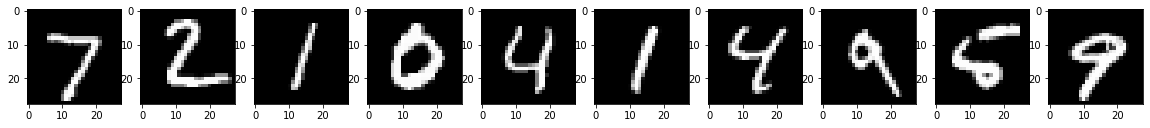

正解ラベル: [7 2 1 0 4 1 4 9 5 9]


In [8]:
# mnistデータの可視化

import matplotlib.pyplot as plt

images_num = 10

plt.figure(figsize=(20,20))
for i in range(images_num):
    plt.subplot(1, images_num, i+1)
    plt.imshow(x_test[i])
    plt.gray()
plt.show()

print("正解ラベル:", y_test[0:images_num])

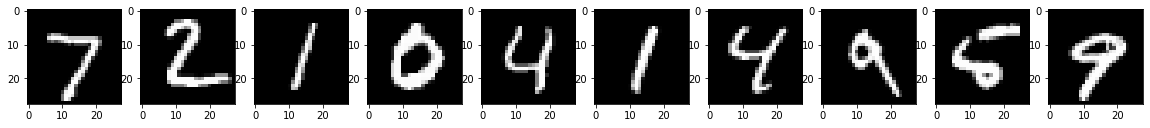

正解ラベル: [7 2 1 0 4 1 4 9 5 9]
モデルの予測値: [7 2 1 0 4 1 4 9 5 9]


In [9]:
# 正解ラベルとモデルの予測値との比較

import matplotlib.pyplot as plt

images_num = 10

plt.figure(figsize=(20,20))

for i in range(images_num):
    plt.subplot(1, images_num, i+1)
    plt.imshow(x_test[i])
    plt.gray()

plt.show()

print("正解ラベル:", y_test[0:images_num])
print("モデルの予測値:", model.predict_classes(x_test[0:images_num]))

In [10]:
# 簡単なCNN

%tensorflow_version 2.x

import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation="relu"),
  tf.keras.layers.MaxPooling2D(),  
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 211us/sample - loss: 0.1477 - accuracy: 0.9557
Epoch 2/5
60000/60000 [==============================] - 10s 168us/sample - loss: 0.0516 - accuracy: 0.9840
Epoch 3/5
60000/60000 [==============================] - 10s 168us/sample - loss: 0.0319 - accuracy: 0.9902
Epoch 4/5
60000/60000 [==============================] - 10s 168us/sample - loss: 0.0212 - accuracy: 0.9935
Epoch 5/5
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0142 - accuracy: 0.9954
10000/10000 - 1s - loss: 0.0476 - accuracy: 0.9857


[0.04755204861696582, 0.9857]

In [11]:
# DropoutとBatch Normalizationの実装

%tensorflow_version 2.x

import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.2894 - accuracy: 0.9120
Epoch 2/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.1528 - accuracy: 0.9535
Epoch 3/5
60000/60000 [==============================] - 8s 131us/sample - loss: 0.1198 - accuracy: 0.9633
Epoch 4/5
60000/60000 [==============================] - 8s 130us/sample - loss: 0.1013 - accuracy: 0.9690
Epoch 5/5
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0896 - accuracy: 0.9721
10000/10000 - 1s - loss: 0.0751 - accuracy: 0.9772


[0.07506793382479914, 0.9772]

0[D_loss_real:0.665955,acc.:_78.12%][D_loss_fake:3.608863,acc.:0.00%][G_loss:4.260443,acc.:0.78%]
1[D_loss_real:0.000006,acc.:_100.00%][D_loss_fake:0.015043,acc.:100.00%][G_loss:22.155469,acc.:0.00%]
2[D_loss_real:2.854647,acc.:_40.62%][D_loss_fake:0.544368,acc.:79.69%][G_loss:13.252035,acc.:19.53%]
3[D_loss_real:0.000000,acc.:_100.00%][D_loss_fake:5.492033,acc.:42.19%][G_loss:13.572407,acc.:34.38%]
4[D_loss_real:0.000000,acc.:_100.00%][D_loss_fake:10.334491,acc.:46.88%][G_loss:14.595224,acc.:39.06%]
5[D_loss_real:0.000000,acc.:_100.00%][D_loss_fake:10.289071,acc.:45.31%][G_loss:15.328166,acc.:33.59%]
6[D_loss_real:0.000000,acc.:_100.00%][D_loss_fake:8.042067,acc.:53.12%][G_loss:16.683688,acc.:29.69%]
7[D_loss_real:0.000000,acc.:_100.00%][D_loss_fake:8.321538,acc.:45.31%][G_loss:15.659375,acc.:19.53%]
8[D_loss_real:0.000006,acc.:_100.00%][D_loss_fake:2.488268,acc.:65.62%][G_loss:16.323804,acc.:0.00%]
9[D_loss_real:4.292076,acc.:_1.56%][D_loss_fake:0.421843,acc.:85.94%][G_loss:14.001611

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


2100[D_loss_real:0.221428,acc.:_89.06%][D_loss_fake:0.197595,acc.:90.62%][G_loss:3.899922,acc.:7.81%]
2101[D_loss_real:0.227372,acc.:_90.62%][D_loss_fake:0.368370,acc.:81.25%][G_loss:3.121554,acc.:10.16%]
2102[D_loss_real:0.104230,acc.:_96.88%][D_loss_fake:0.271974,acc.:92.19%][G_loss:4.281106,acc.:2.34%]
2103[D_loss_real:0.305600,acc.:_89.06%][D_loss_fake:0.185965,acc.:93.75%][G_loss:4.503830,acc.:2.34%]
2104[D_loss_real:0.383187,acc.:_79.69%][D_loss_fake:0.119834,acc.:95.31%][G_loss:3.611949,acc.:7.03%]
2105[D_loss_real:0.173032,acc.:_92.19%][D_loss_fake:0.253175,acc.:90.62%][G_loss:2.883139,acc.:10.16%]
2106[D_loss_real:0.237368,acc.:_89.06%][D_loss_fake:0.481903,acc.:78.12%][G_loss:2.571769,acc.:12.50%]
2107[D_loss_real:0.260708,acc.:_90.62%][D_loss_fake:0.494687,acc.:79.69%][G_loss:3.178623,acc.:7.03%]
2108[D_loss_real:0.409317,acc.:_82.81%][D_loss_fake:0.170519,acc.:96.88%][G_loss:3.224233,acc.:3.91%]
2109[D_loss_real:0.456477,acc.:_81.25%][D_loss_fake:0.246383,acc.:89.06%][G_los

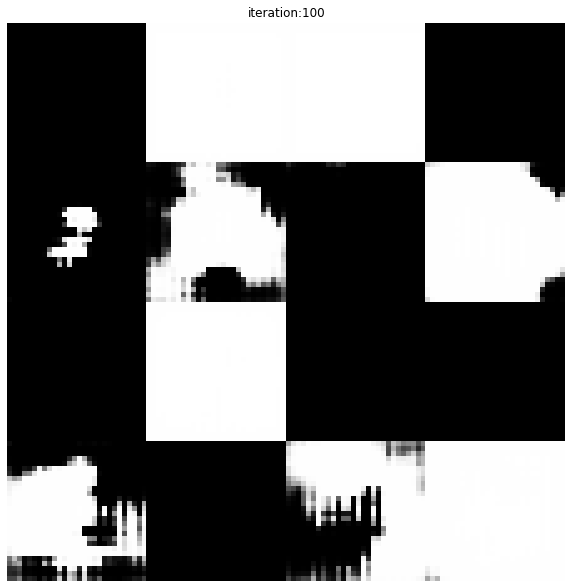

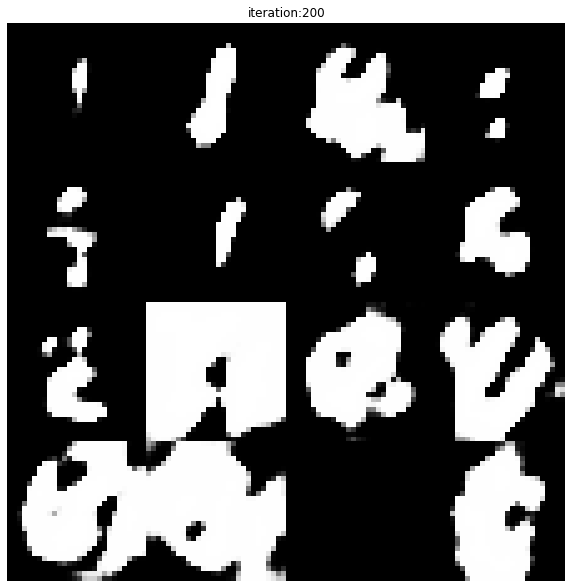

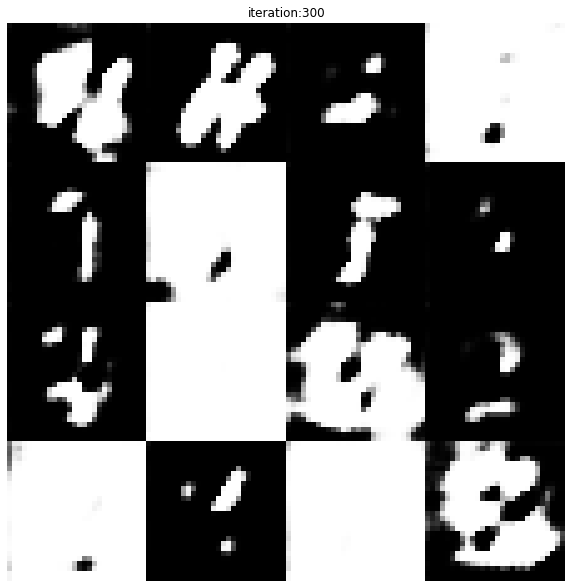

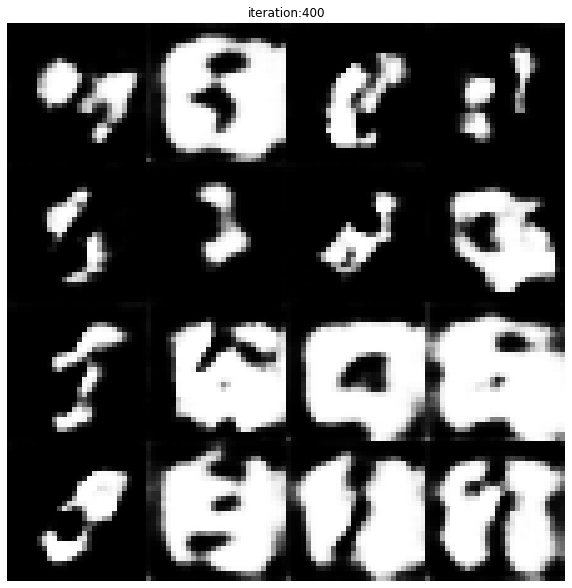

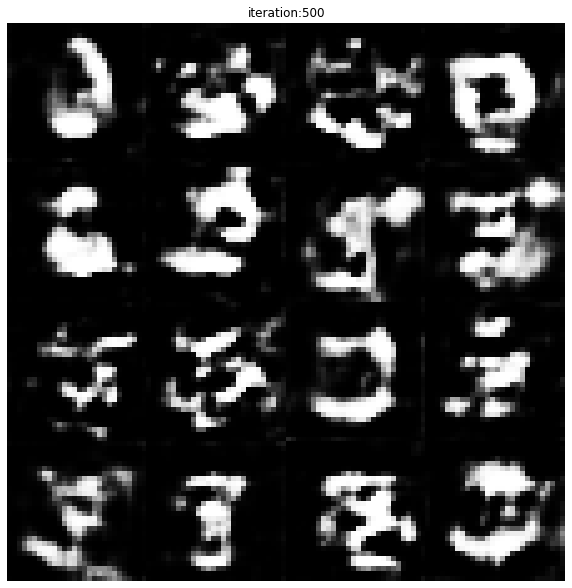

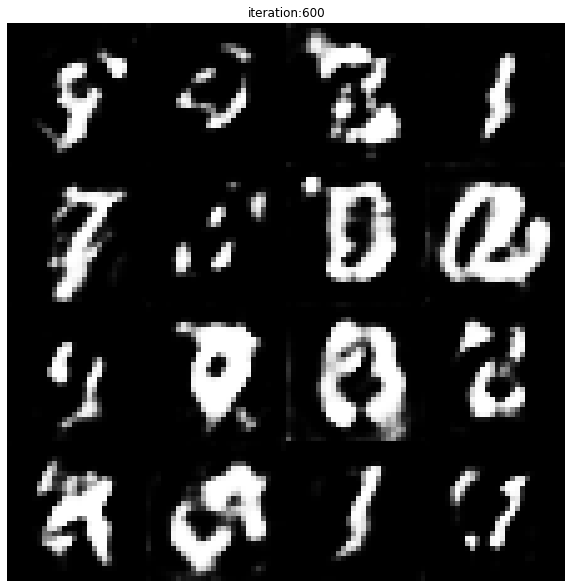

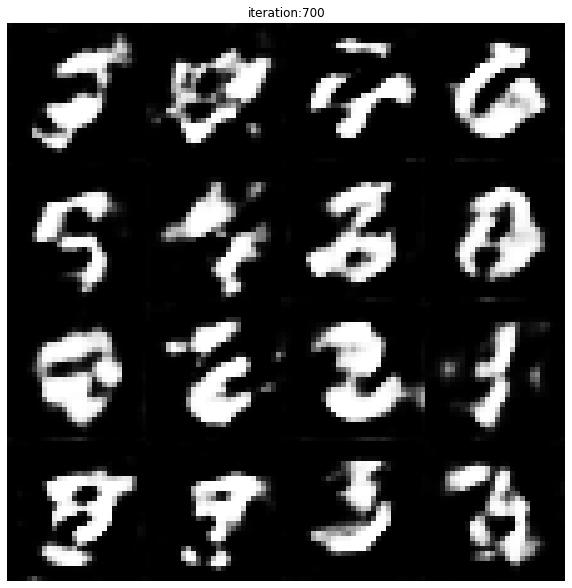

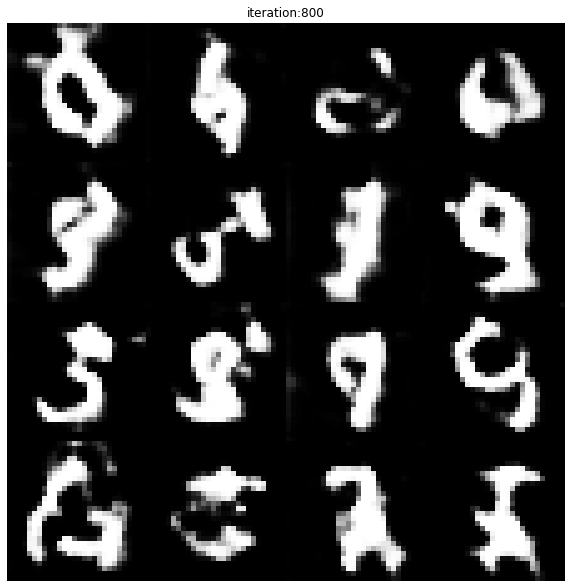

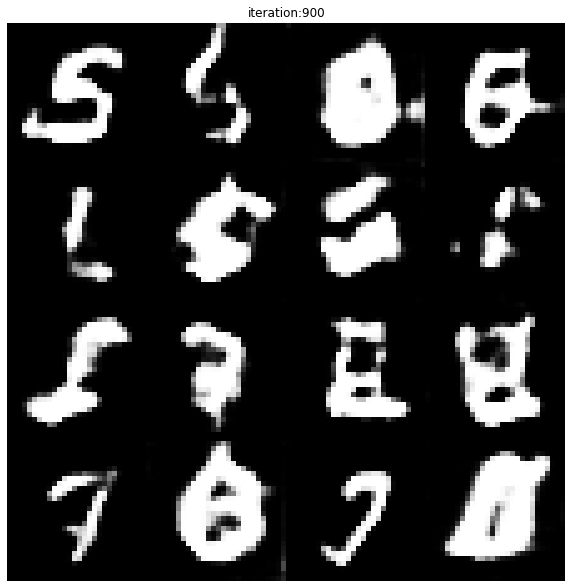

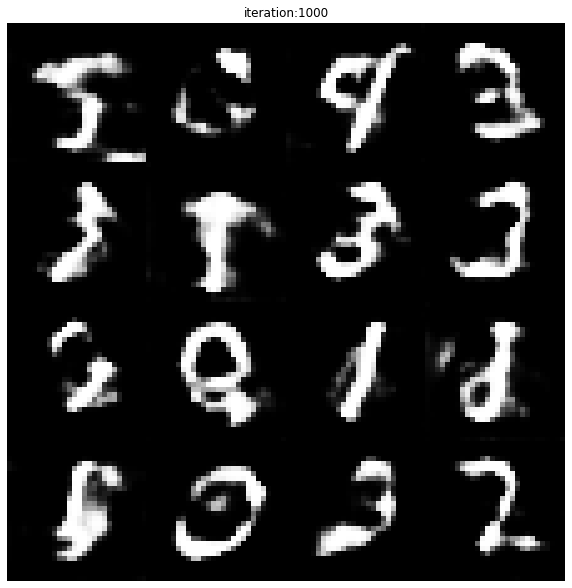

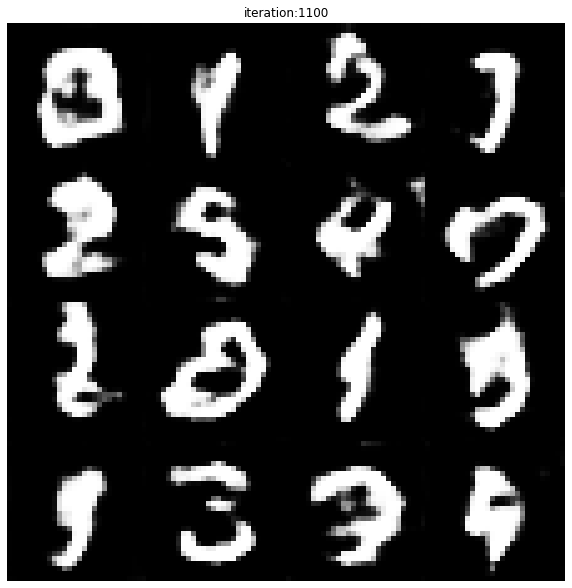

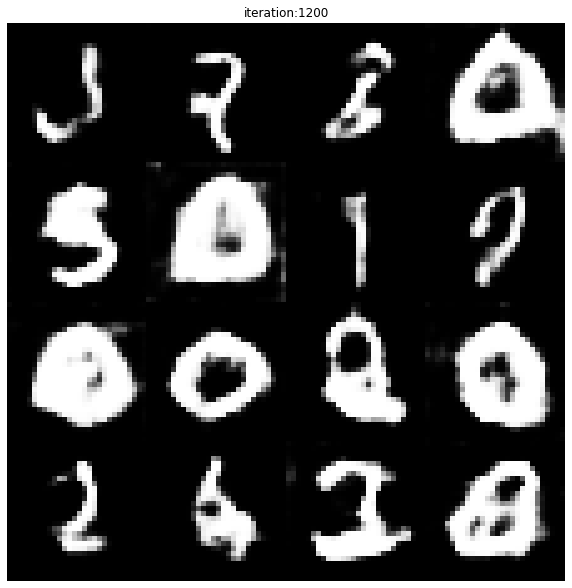

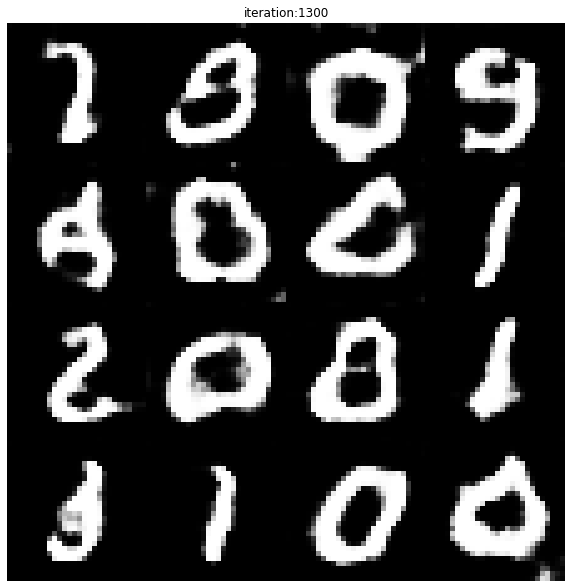

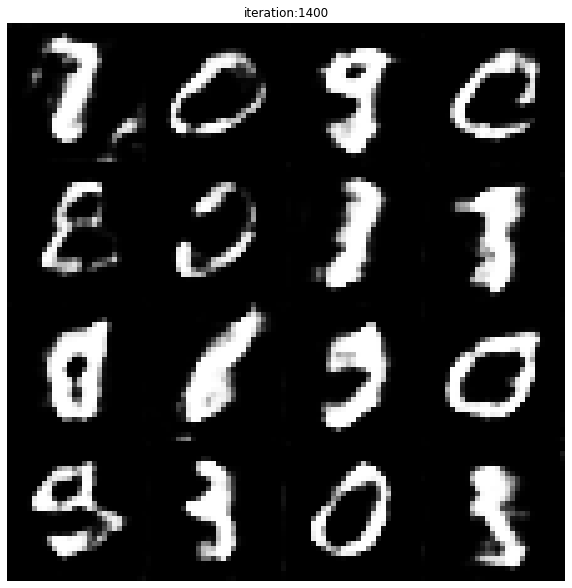

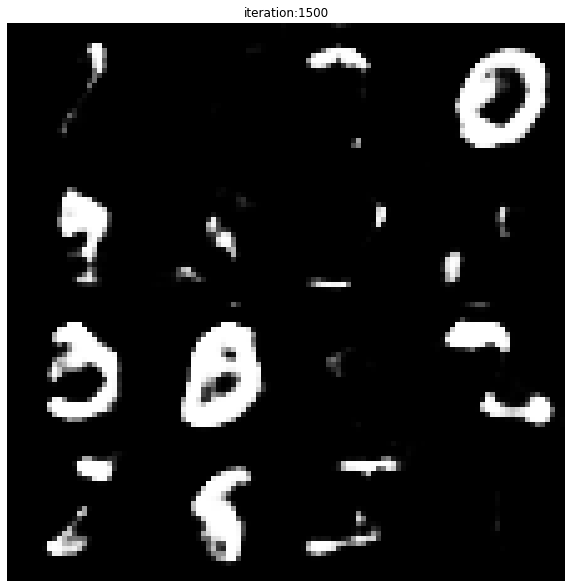

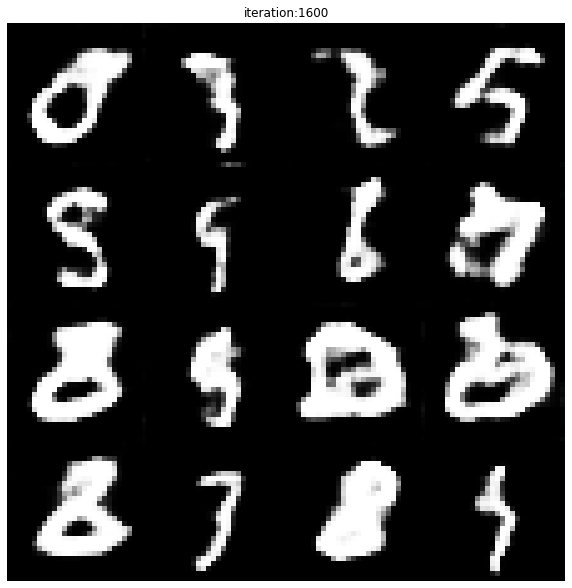

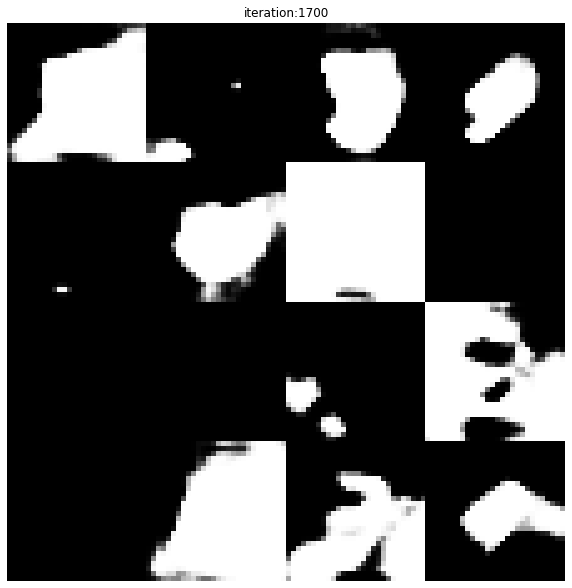

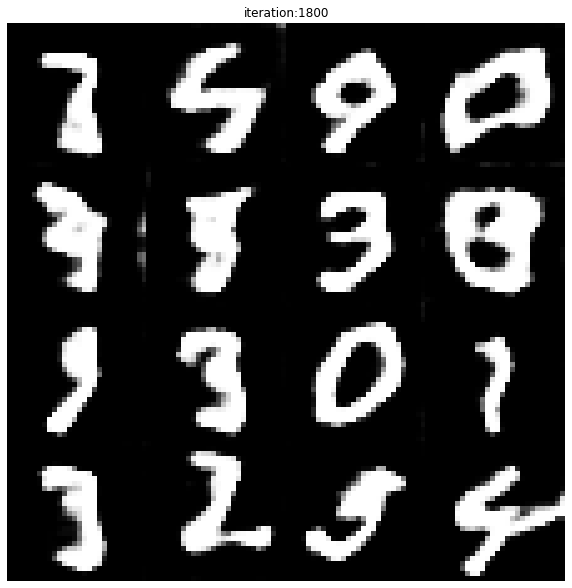

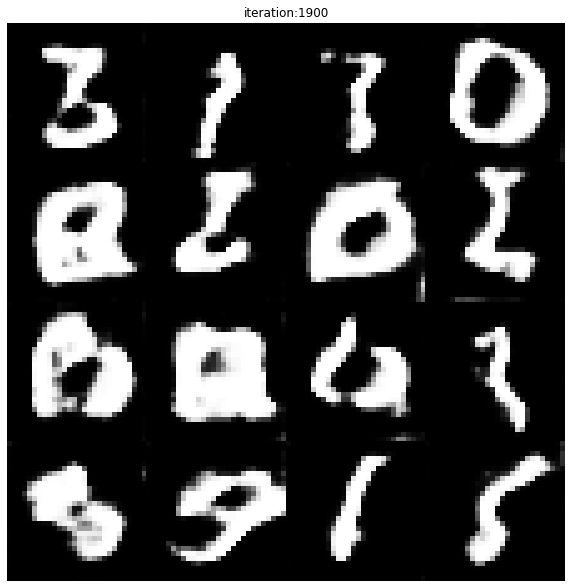

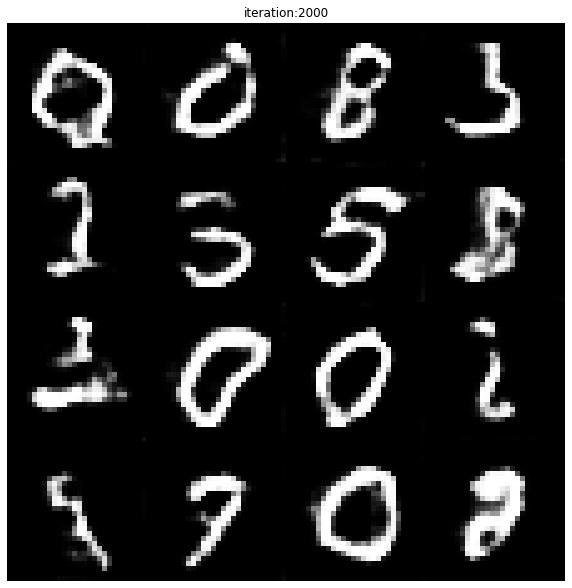

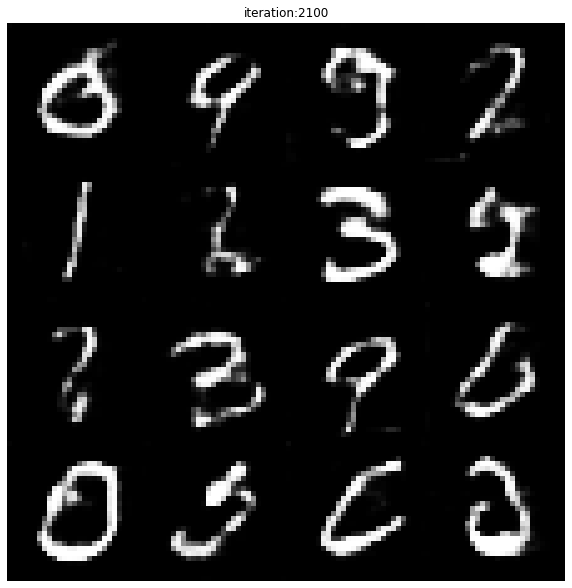

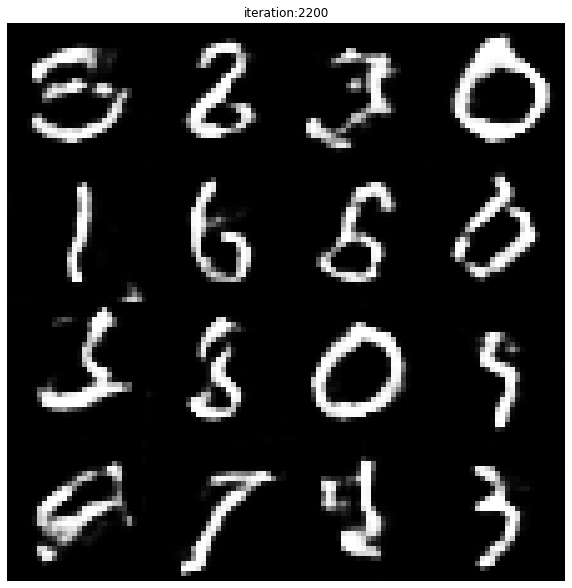

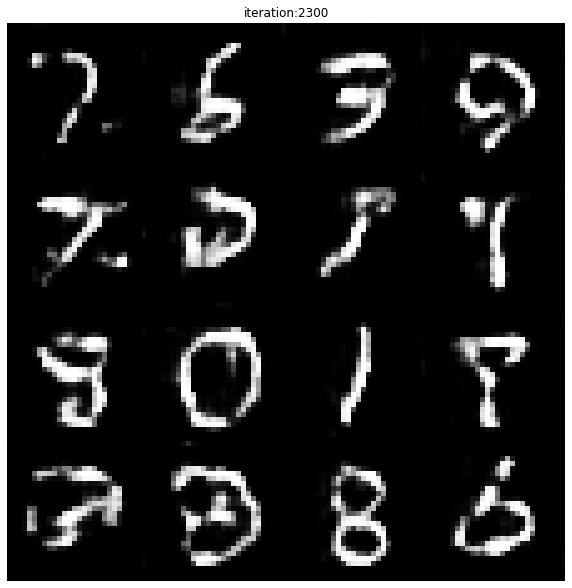

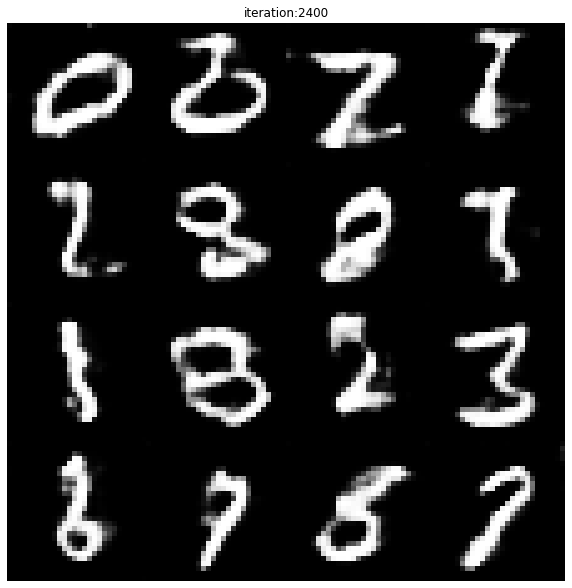

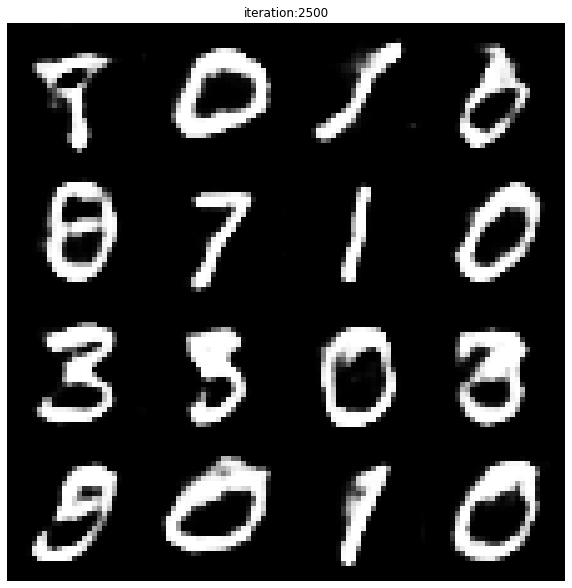

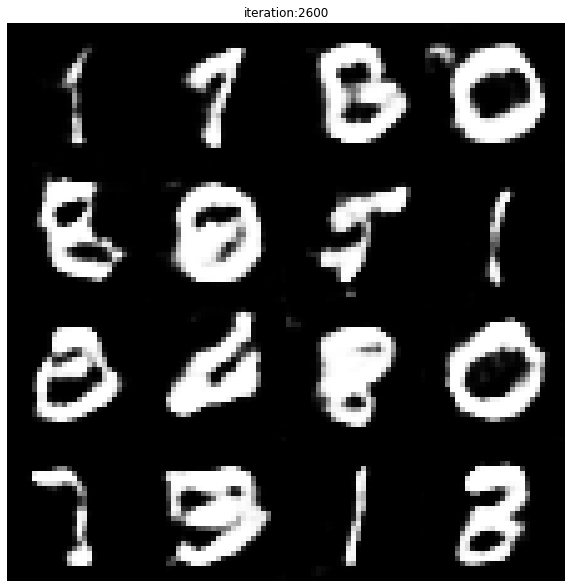

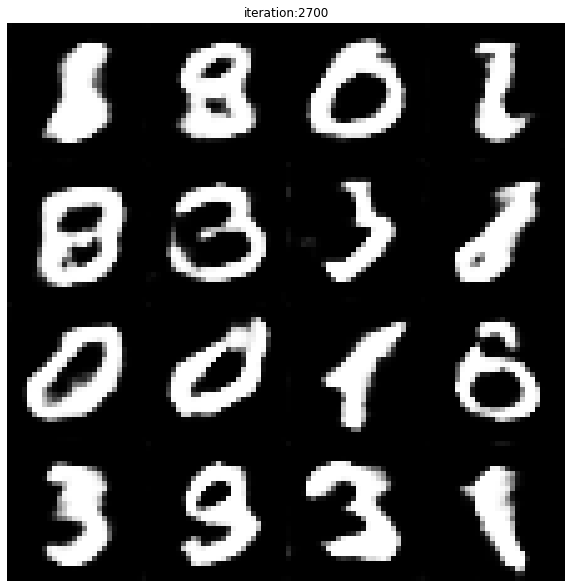

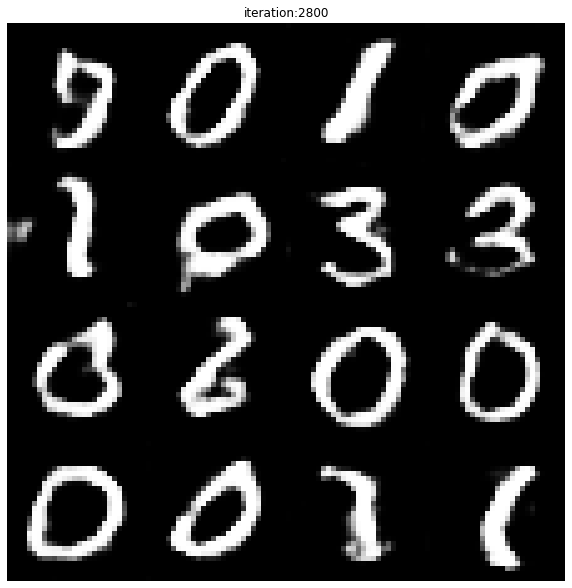

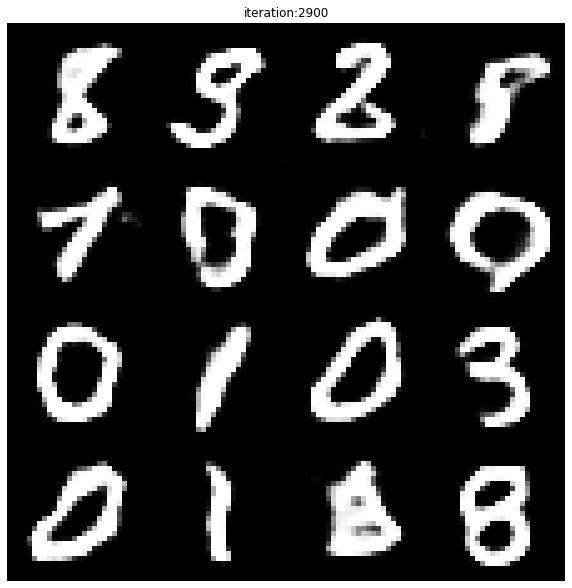

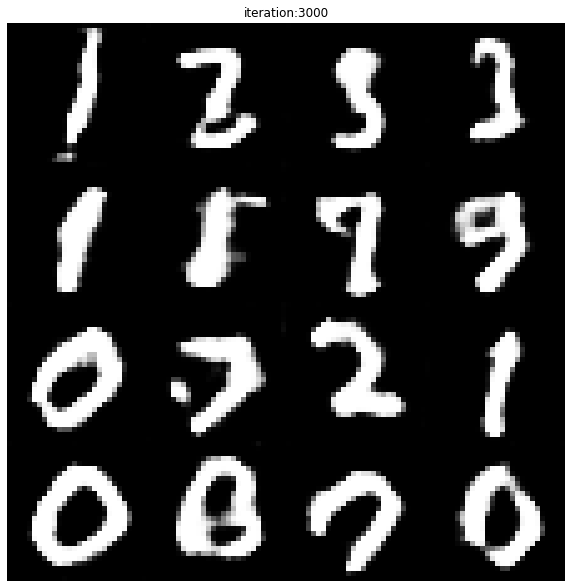

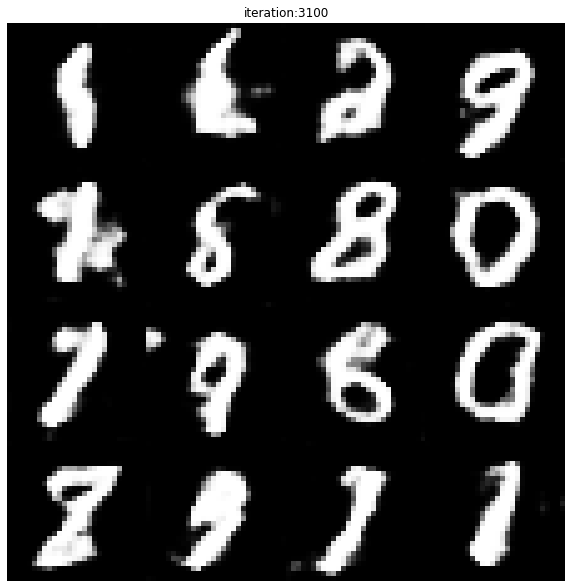

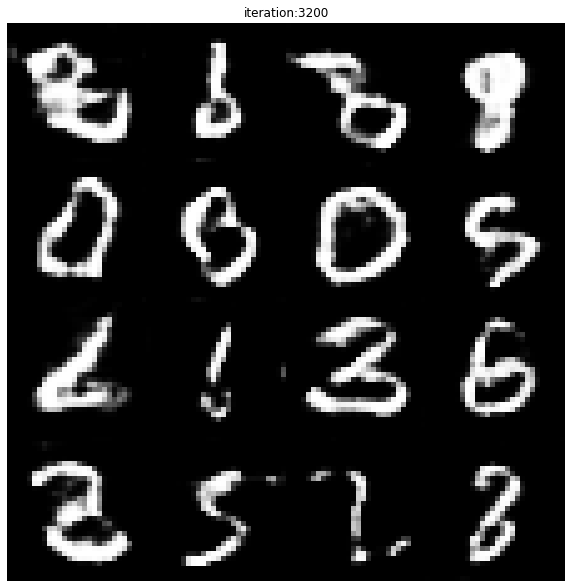

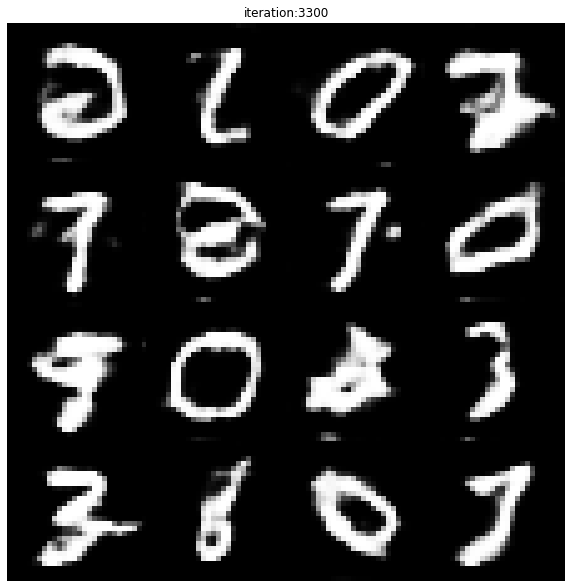

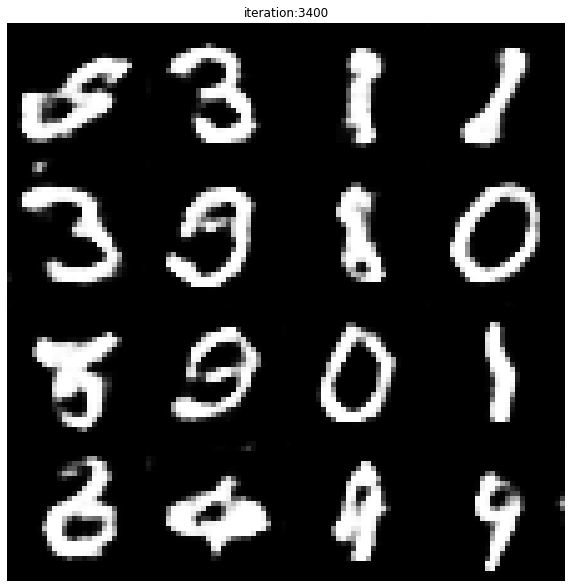

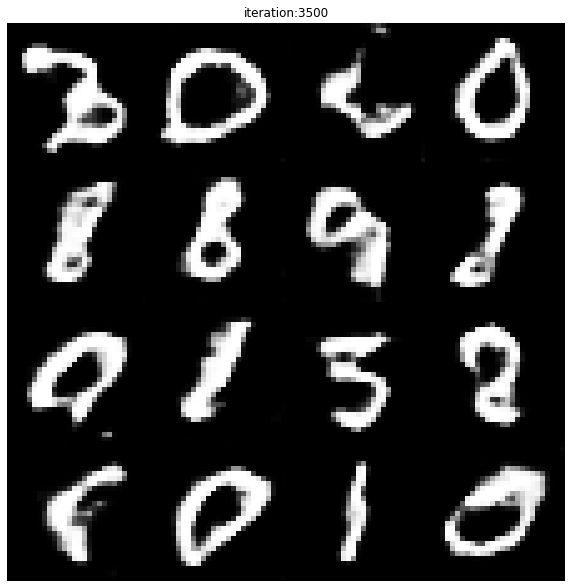

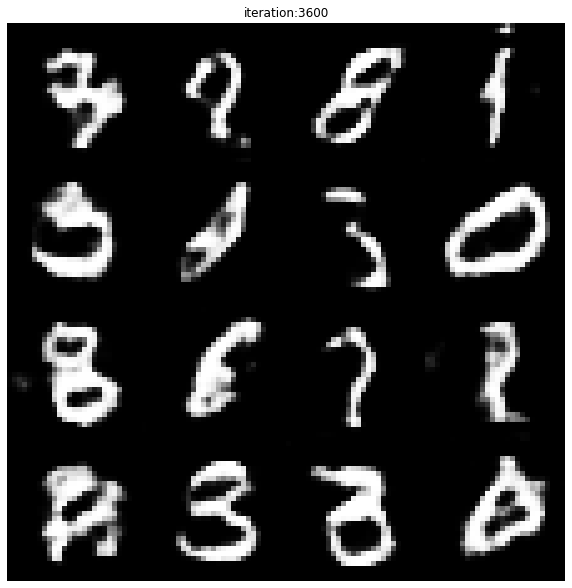

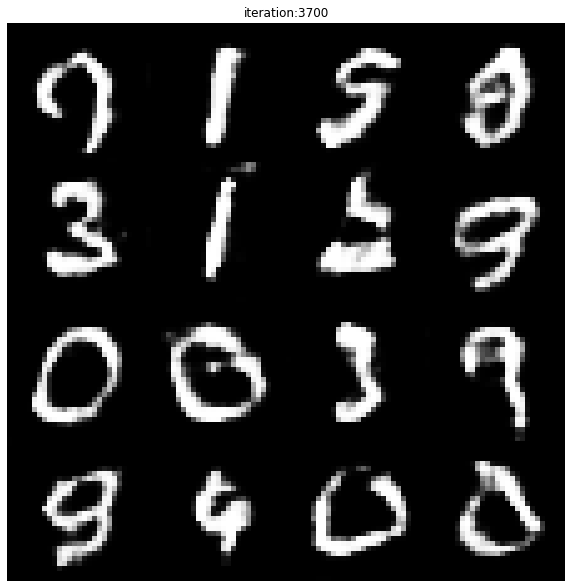

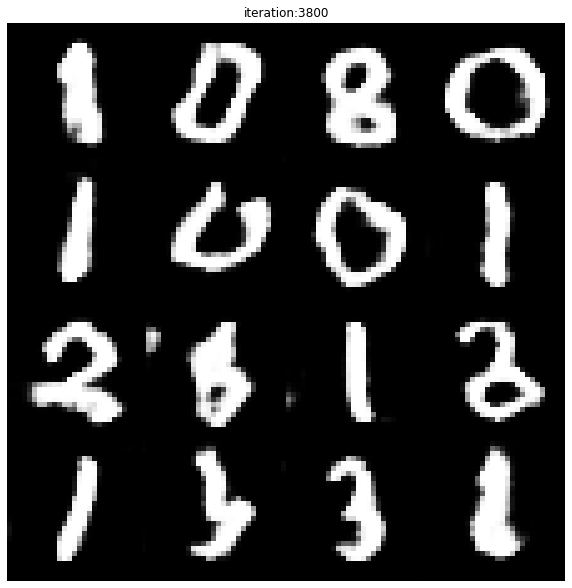

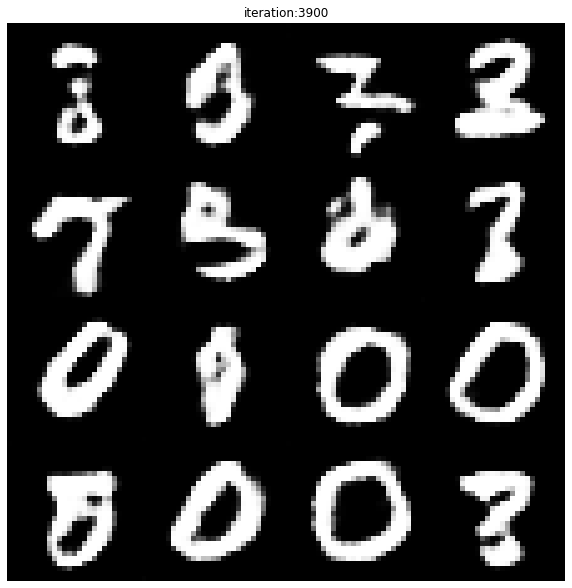

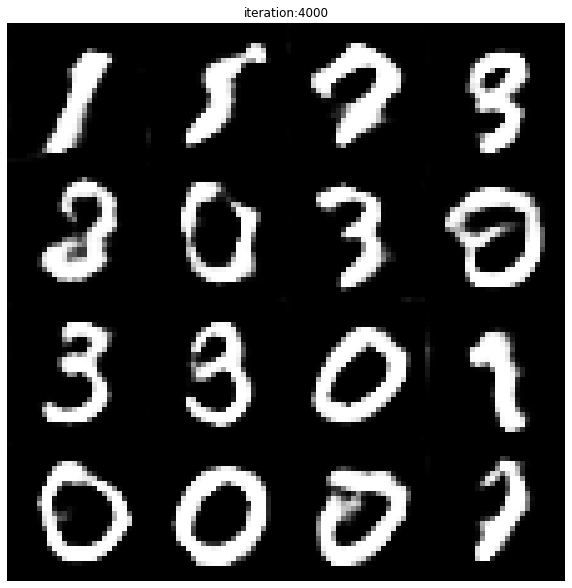

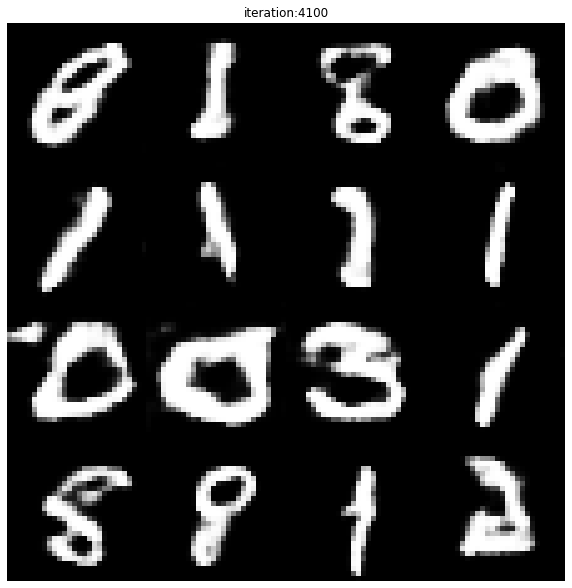

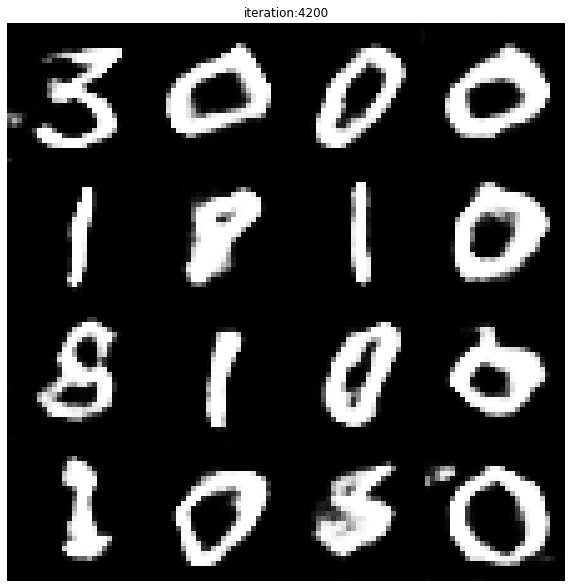

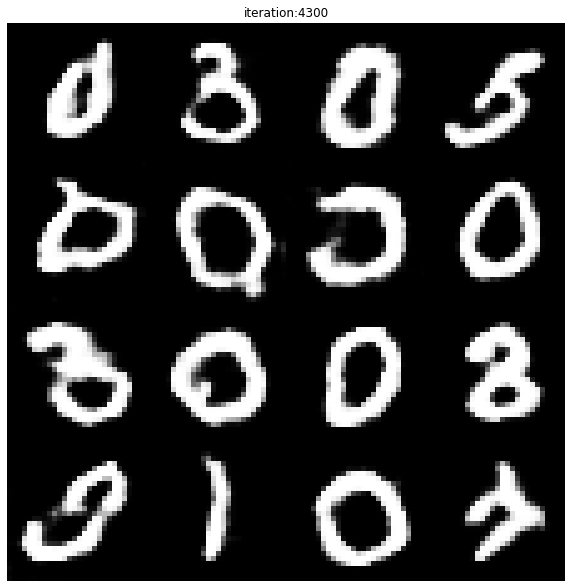

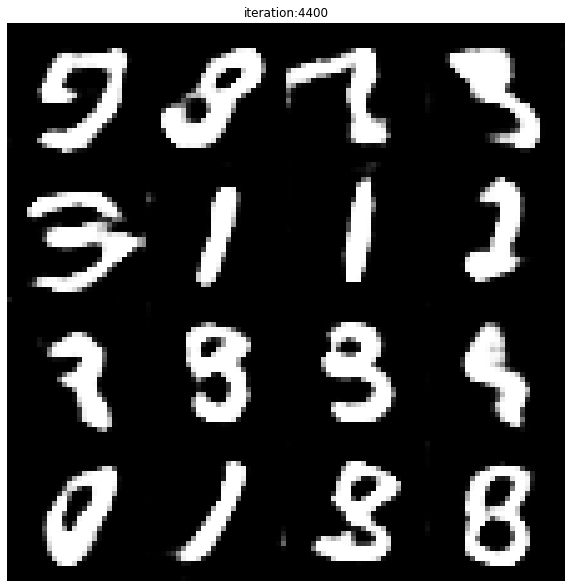

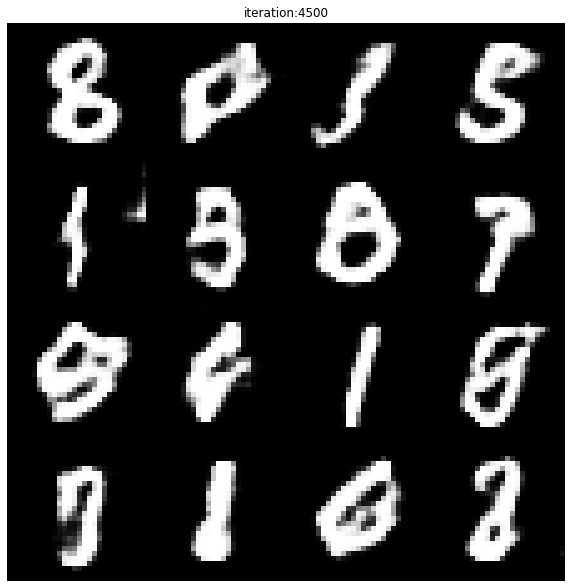

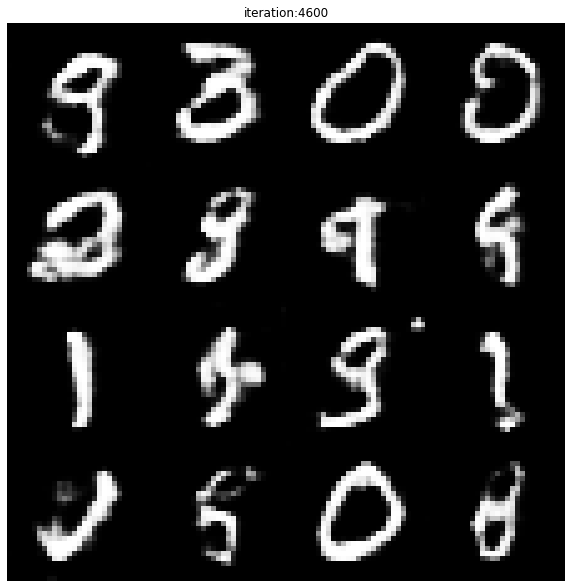

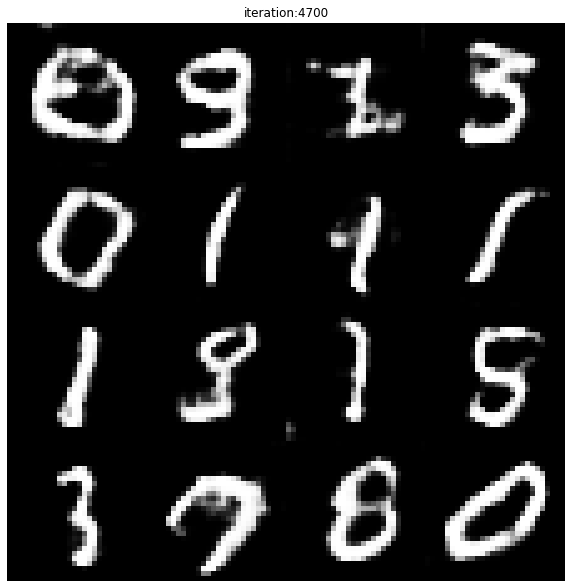

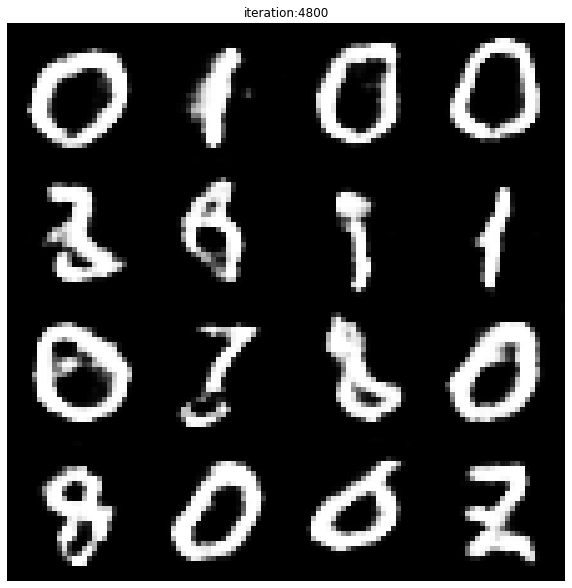

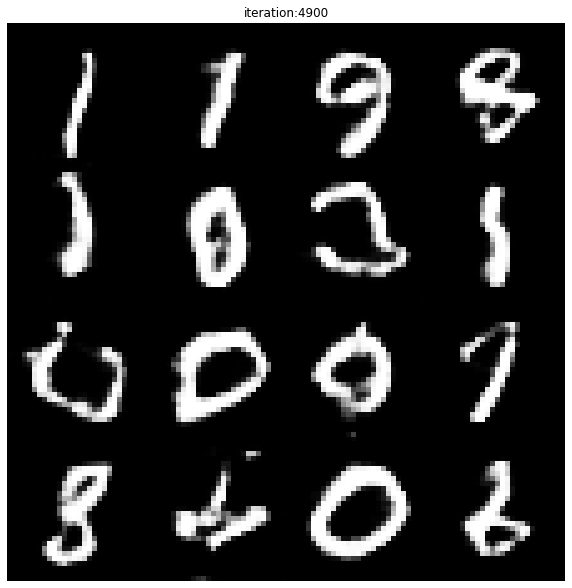

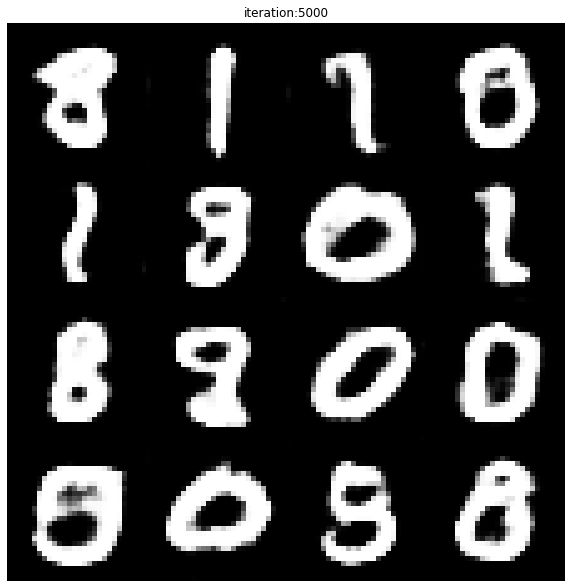

In [13]:
# 初めてのDCGAN

%tensorflow_version 2.x

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
tf.keras.backend.set_floatx("float64")

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train= (x_train - 127.5) / 127.5
x_train = x_train[..., tf.newaxis]


img_x, img_y, img_channel = (28, 28, 1)

discriminator = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (5, 5), input_shape=(img_x, img_y, img_channel), padding="same", activation="tanh"),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Conv2D(128, (5, 5), padding="same", activation="tanh"),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation="tanh"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

discriminator.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


z_dim = 100

generator = tf.keras.models.Sequential([ 
  tf.keras.layers.Dense((img_x/4) * (img_y/4) * 128, input_shape=(z_dim,), activation="tanh"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Reshape((int(img_x/4), int(img_y/4), 128)),
  tf.keras.layers.UpSampling2D(size=(2, 2)),
  tf.keras.layers.Conv2D(64, (5, 5), padding="same", activation="tanh"),
  tf.keras.layers.UpSampling2D(size=(2, 2)),
  tf.keras.layers.Conv2D(1, (5, 5), padding="same", activation="tanh")
])

z_layer = tf.keras.layers.Input(shape=(z_dim,))
img = generator(z_layer)
valid = discriminator(img)
combined = tf.keras.Model(inputs=z_layer, outputs=valid)

discriminator.trainable = False
combined.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])


def save_images(imgs, epoch):
  B, H, W, C = imgs.shape
  batch= (imgs * 127.5)+127.5
  w_num = np.ceil(np.sqrt(B)).astype(np.int)
  h_num = int(np.ceil(B / w_num))
  out = np.zeros((h_num*H, w_num*W), dtype=np.uint8)
  for i in range(B):
    x = i % w_num
    y = i // w_num
    out[y*H:(y+1)*H, x*W:(x+1)*W] = batch[i, ..., 0]

  fname = str(epoch).zfill(4) + ".png"
  save_path = os.path.join("./", fname)
  plt.figure(figsize=(10,12))
  plt.imshow(out, cmap="gray")
  plt.title("iteration:{}".format(epoch))
  plt.axis("off")
  plt.savefig(save_path)


batch_size = 128
half_batch = int(batch_size / 2)

for epoch in range(5000):

  # Training Discriminator with REAL image
  idx = np.random.randint(0, x_train.shape[0], half_batch)
  imgs = x_train[idx]
  d_loss_real = discriminator.train_on_batch(imgs, np.ones(half_batch))

  # Training Discriminator with FAKE image
  z = np.random.normal(0, 1, (half_batch, z_dim))
  gen_imgs = generator.predict(z)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros(half_batch))
  
  # Training Generator
  z = np.random.normal(0, 1, (batch_size, z_dim))
  g_loss = combined.train_on_batch(z, np.ones(batch_size))

  print("%d[D_loss_real:%f,acc.:_%.2f%%][D_loss_fake:%f,acc.:%.2f%%][G_loss:%f,acc.:%.2f%%]" % (epoch, d_loss_real[0], 100 * d_loss_real[1], d_loss_fake[0], 100 * d_loss_fake[1], g_loss[0],100 * g_loss[1]))

  if (epoch+1) % 100 == 0:
    z = np.random.normal(0,1,(16,100))
    imgs = generator.predict(z)
    save_images(imgs, epoch+1)

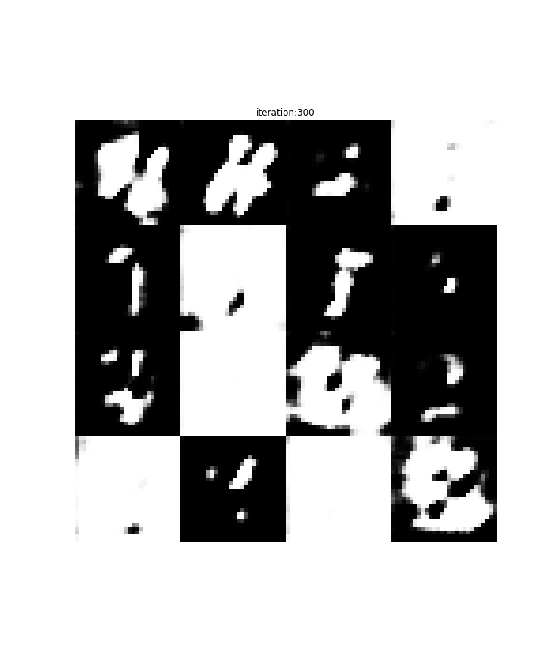

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("0300.png")
im_list = np.asarray(img)

plt.figure(figsize=(10,12))
plt.imshow(im_list)
plt.axis("off")
plt.show()